In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [34]:
espana = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos España/Datos hogar/datos_final_espana.csv",sep=",")
eeuu = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos EEUU/Datos de hogar/datos_final_eeuu.csv",sep=",")
argentina = pd.read_csv("C:/Users/carpa/OneDrive - UFV/Documentos/TFG BA/Datos/Datos Argentina/Datos de hogar/datos_final_argentina.csv",sep=",")

# Unir los DataFrames
merged_df = pd.concat([espana, eeuu, argentina])

# Reestablecer los índices
merged_df.reset_index(drop=True, inplace=True)

# REGRESIÓN LINEAL MÚLTIPLE

In [3]:
# División de los datos en train y test
X = merged_df[['Clase_Social_Alta', 'Clase_Social_Media', 'Clase_Social_Baja']]
y = merged_df['Victimas_Violencia_Genero']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Crear el modelo de regresión lineal múltiple
reg = LinearRegression().fit(X_train, y_train)

In [5]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = reg.predict(X_test)

In [44]:
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio: ", mse)  

Error cuadrático medio: 2.8751297278648784


In [7]:
# Imprimir los coeficientes y el sesgo - Valores de los pesos del modelo de regresión

print("Sesgo (Coeficiente 0: ", reg.intercept_)
print("Coeficiente 1: ", reg.coef_[0])
print("Coeficiente 2: ", reg.coef_[1]) 
print("Coeficiente 3: ", reg.coef_[2]) 

# Imprimir el coeficientes de determinación
print("Coeficiente de determinación: ", reg.score(X_train, y_train)) 

Sesgo (Coeficiente 0: 9584.02000000
Coeficiente 1: 6.91987333
Coeficiente 2: 7.86666666
Coeficiente 3: 2.33333333
Coeficiente de determinación: 0.93827201


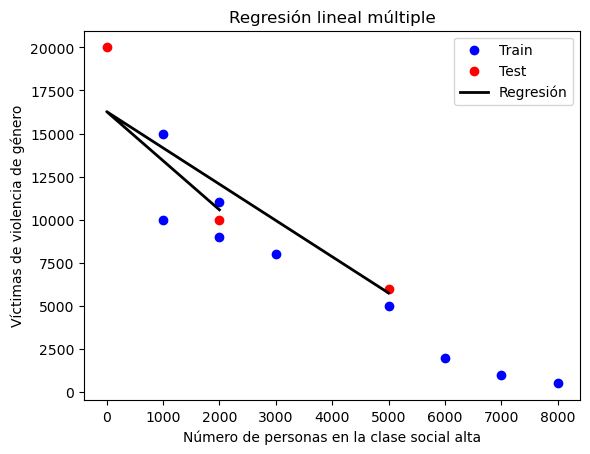

In [8]:
# Salida gráfica

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los puntos de train
ax.scatter(X_train['Clase_Social_Alta'], y_train, color='blue', label='Train')

# Graficar los puntos de test
ax.scatter(X_test['Clase_Social_Alta'], y_test, color='red', label='Test')

# Graficar la recta de regresión
ax.plot(X_test['Clase_Social_Alta'], y_pred, color='black', linewidth=2, label='Regresión')

# Agregar etiquetas al eje X e Y 
ax.set_ylabel("Víctimas de violencia de género")
ax.set_xlabel("Número de personas en la clase social alta")

# Agregar un título al gráfico
ax.set_title("Regresión lineal múltiple")

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

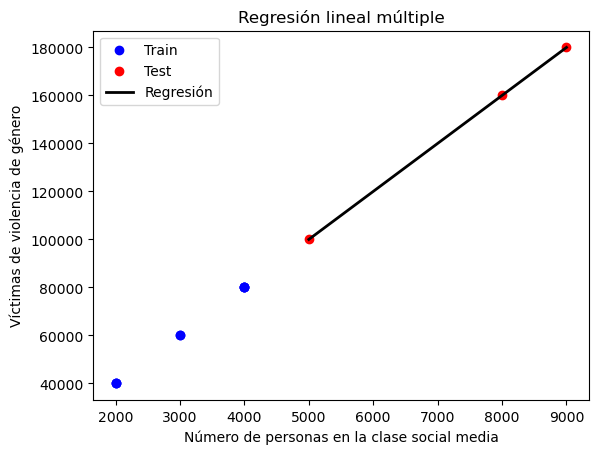

In [32]:
# Salida gráfica

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los puntos de train
ax.scatter(X_train['Clase_Social_Media'], y_train, color='blue', label='Train')

# Graficar los puntos de test
ax.scatter(X_test['Clase_Social_Media'], y_test, color='red', label='Test')

# Graficar la recta de regresión
ax.plot(X_test['Clase_Social_Media'], y_pred, color='black', linewidth=2, label='Regresión')

# Agregar etiquetas al eje X e Y 
ax.set_ylabel("Víctimas de violencia de género")
ax.set_xlabel("Número de personas en la clase social media")

# Agregar un título al gráfico
ax.set_title("Regresión lineal múltiple")

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

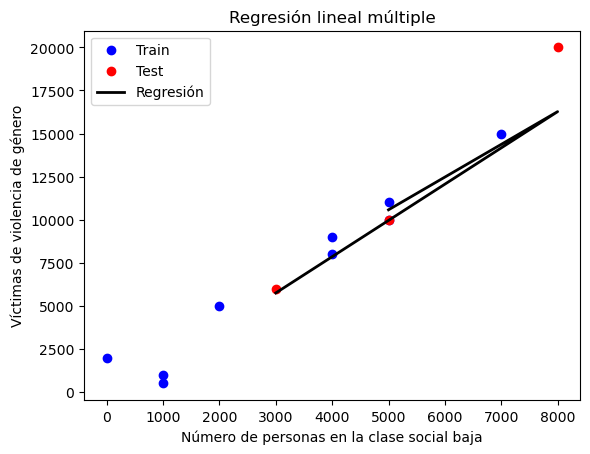

In [10]:
# Salida gráfica

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los puntos de train
ax.scatter(X_train['Clase_Social_Baja'], y_train, color='blue', label='Train')

# Graficar los puntos de test
ax.scatter(X_test['Clase_Social_Baja'], y_test, color='red', label='Test')

# Graficar la recta de regresión
ax.plot(X_test['Clase_Social_Baja'], y_pred, color='black', linewidth=2, label='Regresión')

# Agregar etiquetas al eje X e Y 
ax.set_ylabel("Víctimas de violencia de género")
ax.set_xlabel("Número de personas en la clase social baja")

# Agregar un título al gráfico
ax.set_title("Regresión lineal múltiple")

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

In [41]:
# RMSE
X_test = sm.add_constant(X_test, prepend=True)
predicciones = reg.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
# MSE
mse = mean_squared_error(y_true=y_test, y_pred=predicciones)
# R^2
r2 = r2_score(y_true=y_test, y_pred=predicciones)
# MAE
mae = mean_absolute_error(y_true=y_test, y_pred=predicciones)
# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=predicciones)


print("Regresión Lineal:")
print("==============================")
print(f"El RMSE es: ", {rmse}) 
print(f"El MSE es: ", {mse}) 
print(f"El R^2 es: ", {r2}) 
print(f"El MAE es: ", {mae}) 
print(f"El MAPE es: ", {mape}) 

Regresión Lineal:
El RMSE es: 1.6956207500101191
El MSE es: 2.8751297278648784
El R^2 es: 0.9383422417084592
El MAE es: 1.2289371151464508
El MAPE es: 57.84650493563371


# REGRESIÓN POLINÓMICA

In [42]:
degree = 3  # Grado del polinomio
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)


In [42]:
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

print("Regresión Polinómica:")
print("=============================")
print("El RMSE es: ", test_rmse ) 
print("El MSE es: ", test_mse) 
print("El R^2 es: ", test_r2 ) 
print("El MAE es: ", test_mae ) 
print("El MAPE es: ", test_mape ) 

Regresión Polinómica:
El RMSE es: 342.63503117
El MSE es: 103.4032745
El R^2 es: 0.78714386714
El MAE es: 572.7507312
El MAPE es: 59.0183407219
